# Homework 3
## Parker George
### Jan 31, 2025

# Problem 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def func1(x):
    if np.iterable(x): # checks wether or not the input is an array or a single number
        for i in range(0,len(x)):
            return np.max(x**2) # returns the max number in the array squared
    else:
        return x**2 # returns the number squared

In [5]:
x = np.array([13,1,2,3,4,5,15,6,7,8,9,12])
print(func1(x))
print(func1(10))

225
100


In [6]:
def func2(a,b,c):
    result = np.where(np.logical_and(a+b>c,a+b<2*(c**2)),a+b,-c)
    return result


In [7]:
A = np.array([1,2,3,4,5,6,7,8,9])
B = np.array([2,4,6,8,10,12,14,16,18])
C = np.array([0,9,1,8,2,7,3,6,4])
print(func2(A,B,C))

[ 0 -9 -1 12 -2 18 -3 24 27]


# Problem 2

In [8]:
def coin_flip(p):
    #if np.random.rand() > p:
      #  return 'Heads'
   # else:
     #   return 'Tails'
    return 'Heads' if np.random.rand() <= p else 'Tails'


In [9]:
coin_flip(0.5)

'Tails'

In [10]:
def results(N):
    fin = np.zeros(N)

    for i in range(0,N):
        if coin_flip(0.5) == 'Heads':
            fin[i] += 1
        else:
            fin[i] += -1
    return fin

In [11]:
results(100)

array([-1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1.,
       -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,
        1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.])

In [12]:
def do_you_wanna_play_a_game(p):
    money = 50
    count = 0
    while 0<money<150:
        count += 1
        if coin_flip(p) == 'Heads':
            money += 1
        else:
            money -= 1
    return ('You Lost',money,count)if money < 150 else ('You Won',money,count)

In [51]:
N = 0
while N<10:
    print(do_you_wanna_play_a_game(0.45))
    N+=1

('You Lost', 0, 482)
('You Lost', 0, 656)
('You Lost', 0, 420)
('You Lost', 0, 616)
('You Lost', 0, 640)
('You Lost', 0, 368)
('You Lost', 0, 486)
('You Lost', 0, 492)
('You Lost', 0, 630)
('You Lost', 0, 494)


# Problem 3

In [14]:
import time

In [15]:
def rand_gen(a,b):
    #randomout = np.zeros(N)
    if a == 0 or b == 0:
         raise TypeError('Cannot Multiply or divide by zero')
    #for i in range(0,N):
    randomout = (a*time.time())%b
    return randomout / (b-1)

rand_gen(123456789,987654321)

0.5033147073158147

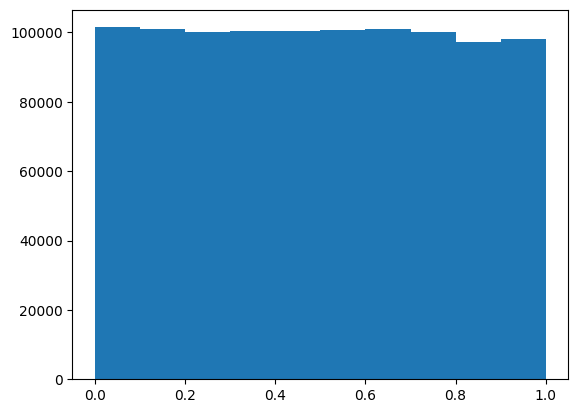

In [16]:
# Very uniform
n = 1000000
dist1 = np.zeros(n)
for i in range(0,n):
    dist1[i] = rand_gen(87178291199,84673)
plt.hist(dist1)
plt.show()

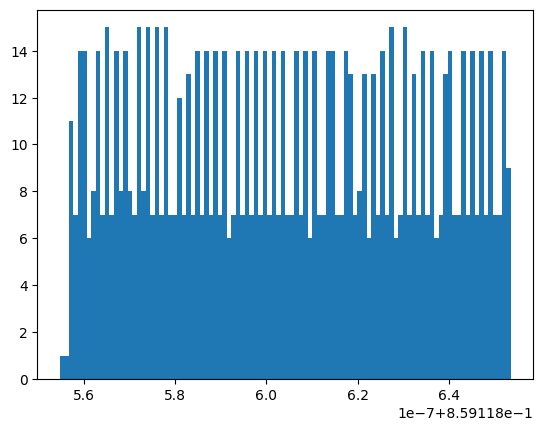

In [17]:
# Not Uniform
n = 1000
dist2 = np.zeros(n)
for i in range(0,n):
    dist2[i] = rand_gen(123456,182459876)
plt.hist(dist2,bins=100)
plt.show()

## Quick note on challenge problem:
So I tried to get it working with my random number generator, but I kept running into the issue that the numbers were too close together and I never really got a good distribution to show up. I also wasn't totally sure if you wanted the absolute value of the x values or to just have the negative x values be zero, one distribution looks good, the other is just over saturated at zero sadly.

In [33]:
def poisson(N):
    out = []
    for i in range(0,N):
        x = np.random.rand()*10-5
        y = np.random.rand()
        #x = rand_gen(np.arange(1,10000),100)*10-5
        #y = rand_gen(np.arange(1,10000),100)

        if x < 0:
            x = 0
        if np.exp(-x) > y:
            out.append(x)

    return np.array(out)

def poisson_abs(N):
    out = []
    for i in range(0,N):
        x = np.absolute(np.random.rand()*10-5)
        y = np.random.rand()
        #x = rand_gen(np.arange(1,10000),100)*10-5
        #y = rand_gen(np.arange(1,10000),100)

        if x < 0:
            x = 0
        if np.exp(-x) > y:
            out.append(x)

    return np.array(out)

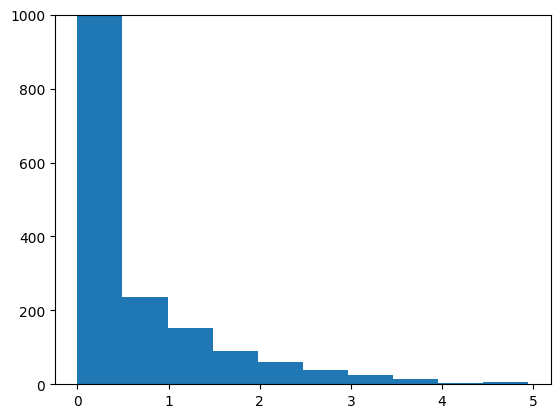

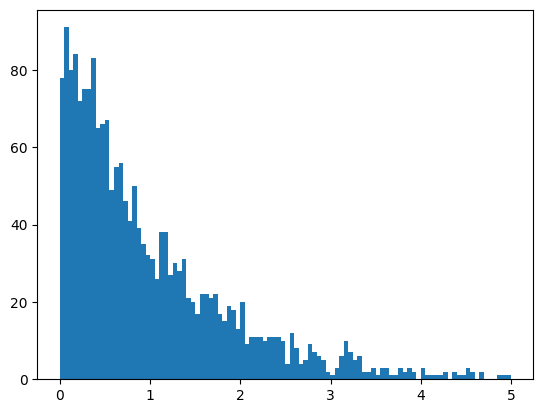

In [37]:
normal = poisson(10000)
plt.hist(normal)
plt.ylim(0,1000)
plt.show()

plt.hist(poisson_abs(10000), bins=100)
plt.show()